In [1]:
# Function transforming cartesian coordinates in polar coordinates (r,phi)
import numpy as np
def car2pol_r(x, y):
    r = np.sqrt(x**2 + y**2)
    return(r)
def car2pol_phi(x, y):
    phi = np.arctan2(y, x)
    return(phi)

In [4]:
import pandas as pd
def df_transform_polar(batch,animall):
    df = pd.read_csv("Batch" + str(batch) + "/OutputAnimal" + str(batch) + str(animall) + ".csv", index_col = 0)
    my_baseline = pd.read_csv("Batch" + str(batch) + "/BaselineExpression" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    
    my_baseline_polar = pd.DataFrame(index = my_baseline.index, columns = ['Ear1.r','Ear1.phi','Ear2.r','Ear2.phi','Ear3.r','Ear3.phi','Ear4.r','Ear4.phi','Ear5.r','Ear5.phi','Eye1.r','Eye1.phi','Eye2.r','Eye2.phi','Eye3.r','Eye3.phi','Eye4.r','Eye4.phi','SnoutMid.r','SnoutMid.phi','NoseTip.r','NoseTip.phi','Mouth.r','Mouth.phi'])
    for col in [0,2,4,6,8,10,12,14,16,18,20,22]:
        my_baseline_polar.iat[0, col] = car2pol_r(my_baseline.iat[0,col],my_baseline.iat[0,col+1])
        my_baseline_polar.iat[0, col+1] = car2pol_phi(my_baseline.iat[0,col],my_baseline.iat[0,col+1])
    df_polar = pd.DataFrame(index = df.index, columns = ['Ear1.r','Ear1.phi','Ear2.r','Ear2.phi','Ear3.r','Ear3.phi','Ear4.r','Ear4.phi','Ear5.r','Ear5.phi','Eye1.r','Eye1.phi','Eye2.r','Eye2.phi','Eye3.r','Eye3.phi','Eye4.r','Eye4.phi','SnoutMid.r','SnoutMid.phi','NoseTip.r','NoseTip.phi','Mouth.r','Mouth.phi'])
    for frame in df.index:
        for col in [0,2,4,6,8,10,12,14,16,18,20,22]:
            df_polar.iat[frame, col] = car2pol_r(df.iat[frame,col],df.iat[frame,col+1])
            df_polar.iat[frame, col+1] = car2pol_phi(df.iat[frame,col],df.iat[frame,col+1])
        #Subtracting baseline
        df_polar.loc[frame,:] = df_polar.loc[frame,:] - my_baseline_polar.loc[0,:]
    df_polar.to_csv("Batch" + str(batch) + "/PolarCoordinates_Animal" + str(batch) + str(animall) + ".csv")  
    return df_polar

df_transform_polar("1","1")
df_transform_polar("1","2")
df_transform_polar("2","1")
df_transform_polar("2","2")
df_transform_polar("2","3")
df_transform_polar("2","4")

,Ear1.r,Ear1.phi,Ear2.r,Ear2.phi,Ear3.r,Ear3.phi,Ear4.r,Ear4.phi,Ear5.r,Ear5.phi,...,Eye3.r,Eye3.phi,Eye4.r,Eye4.phi,SnoutMid.r,SnoutMid.phi,NoseTip.r,NoseTip.phi,Mouth.r,Mouth.phi
0,-2.8145,0.0193406,-1.12768,0.0204322,-0.762586,0.013265,-1.36057,0.000691599,-2.66526,0.00399036,...,-0.184837,-0.000558551,-0.401068,-0.00102786,-1.46369,0.000528563,-4.47795,-0.00368319,0.745203,-0.00245158
1,-0.989958,0.0192816,2.70596,0.0226779,7.39956,0.0101056,3.58093,-0.010482,0.0504157,-0.00849191,...,0.0694067,-0.00252498,-1.04275,-0.00308624,-0.895313,0.000752,1.9298,0.0031734,0.915887,-0.000716854
2,-2.4283,0.0199623,-0.03428,0.0288406,1.9284,0.0184959,1.54625,0.00680291,-2.06418,0.00809991,...,-0.0220064,-0.00164164,-0.790277,-0.00250927,1.03313,8.07939e-05,3.6022,0.00439128,1.15556,1.71724e-05
3,-2.59822,0.016283,-1.88646,0.0203634,0.129204,0.0163009,0.453376,0.00617818,-2.37375,0.00558699,...,-0.122366,-0.00158494,-0.612053,-0.00187056,-1.34539,0.00123588,1.90485,0.00226935,0.690734,0.00108967
4,-2.54573,0.0154465,-2.70133,0.0168917,-0.853592,0.013314,-0.709876,0.00348096,-2.83284,0.00191585,...,-0.199236,-0.00196022,-0.63793,-0.00221408,-0.594127,0.00132688,0.648268,0.00150193,1.0199,-0.00267974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14424,-0.740936,0.0209335,-0.205468,0.0185753,0.661862,0.00302498,-4.27067,-0.0127362,-2.17561,-0.0192213,...,1.8517,0.000460356,1.59113,0.0039582,3.06698,0.00637099,2.06723,0.00521291,-0.13751,0.00838108
14425,1.79951,0.0102803,1.83234,0.00888287,2.81501,-0.00514155,-0.42921,-0.0194656,-1.71924,-0.0229121,...,1.85438,-0.000661085,1.60367,0.00245968,3.83351,0.00624925,1.47635,0.00587619,-0.87001,0.00760484
14426,2.30466,0.0086246,2.14702,0.00747388,3.32449,-0.00722099,0.235579,-0.0238087,-0.438192,-0.0291054,...,1.21198,-0.00177921,0.592617,0.00155862,2.5161,0.00571406,-2.00007,0.00483027,0.357898,0.00480075
14427,0.832024,0.0119248,0.509026,0.0110951,1.24657,-0.00218191,-1.98391,-0.0195569,-1.66767,-0.0258877,...,1.54471,-0.00109571,0.89802,0.00239823,3.30183,0.00558922,-1.53585,0.00508902,0.892223,0.00506814


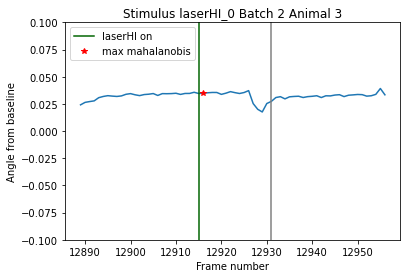

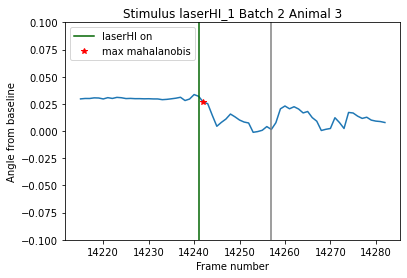

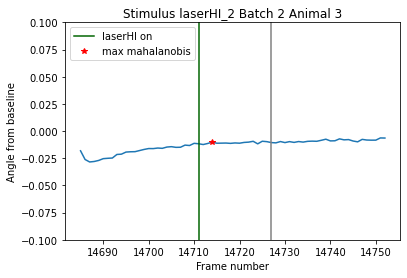

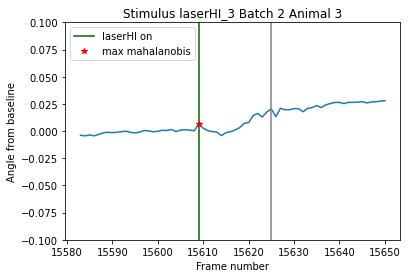

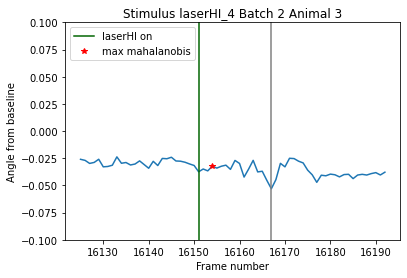

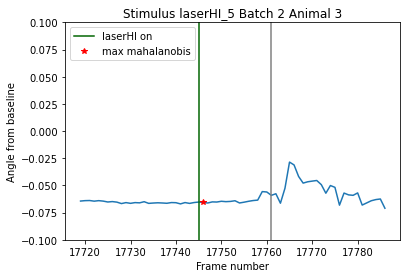

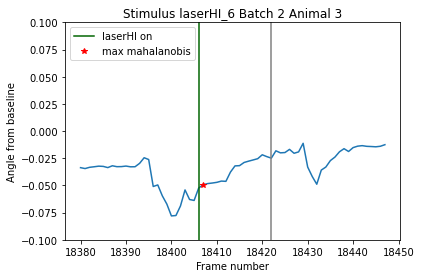

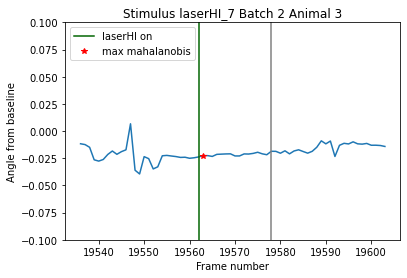

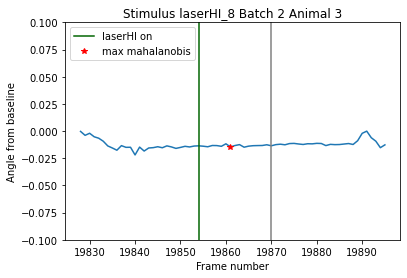

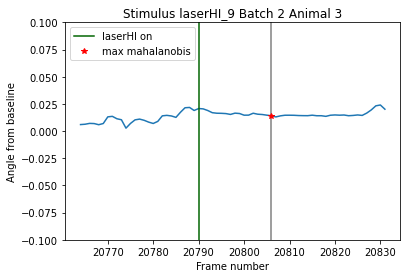

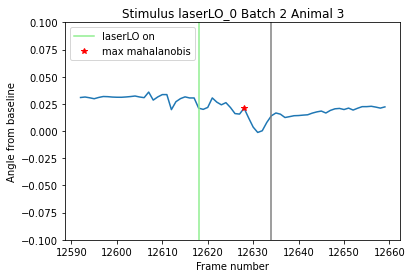

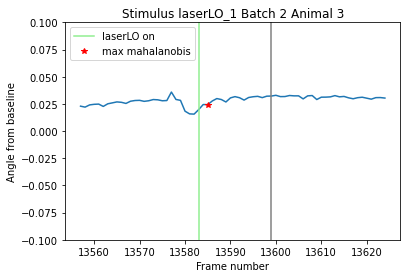

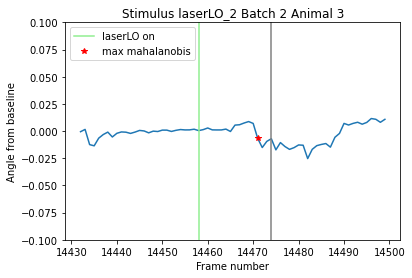

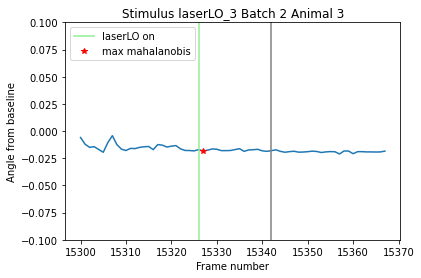

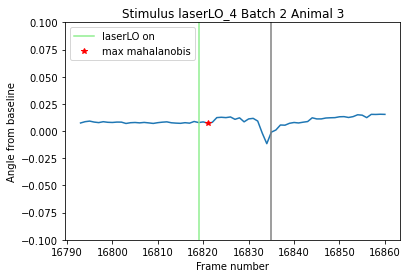

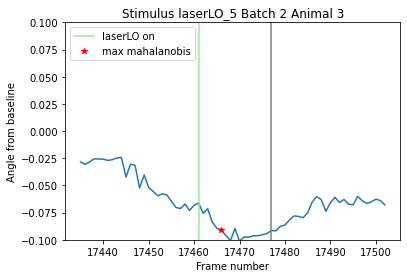

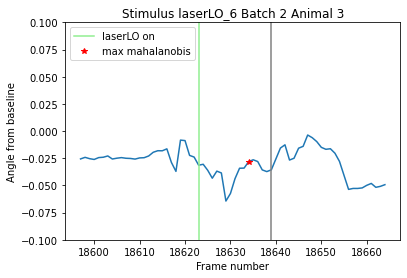

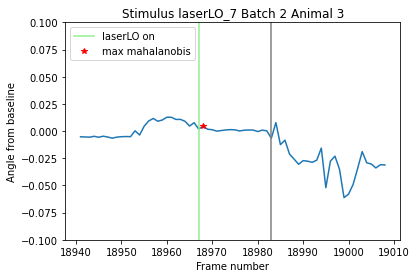

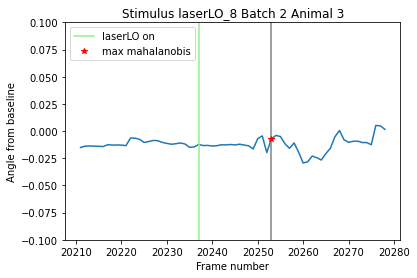

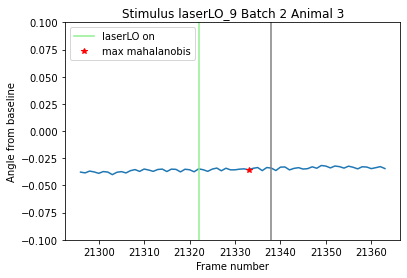

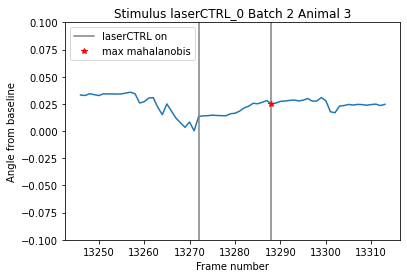

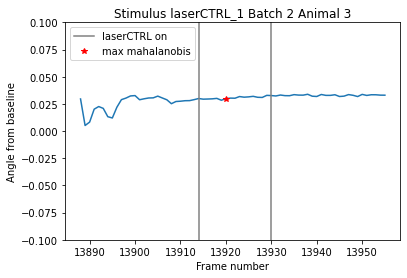

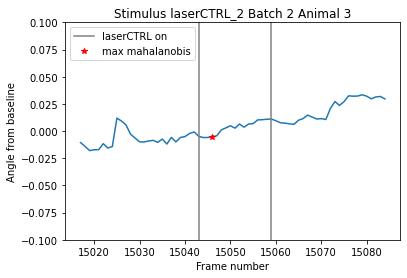

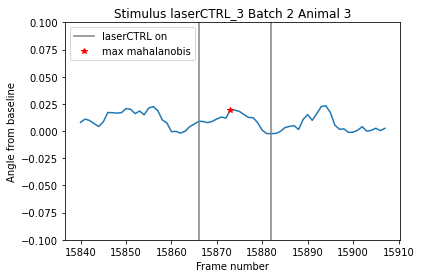

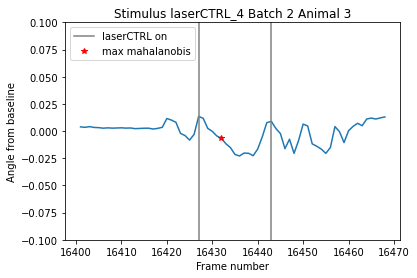

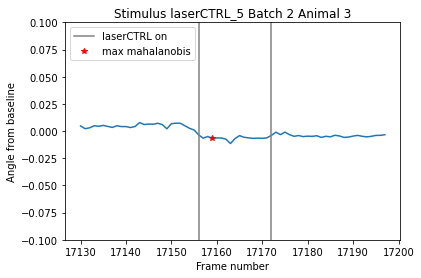

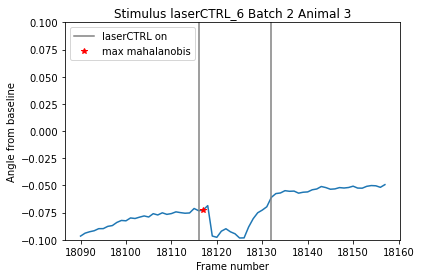

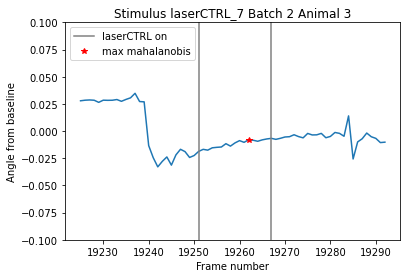

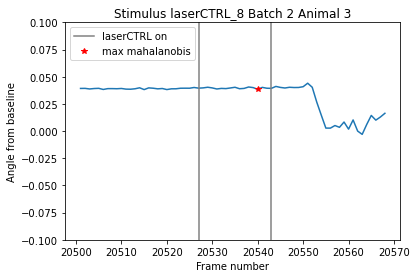

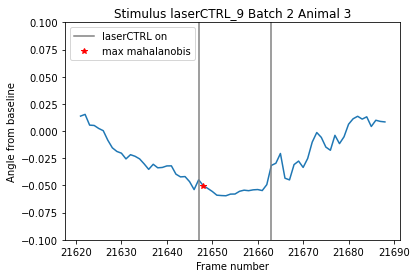

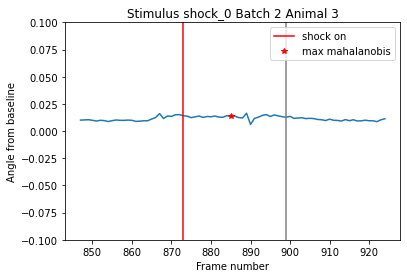

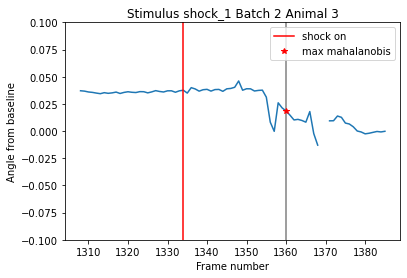

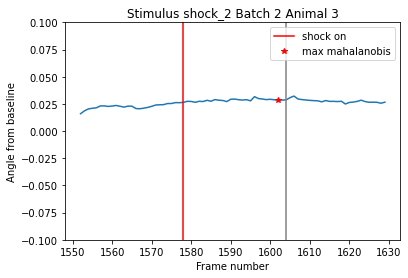

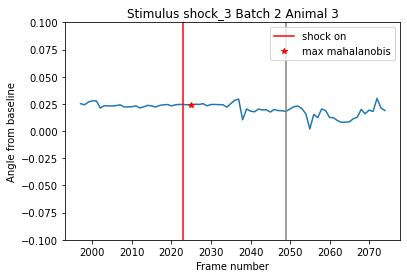

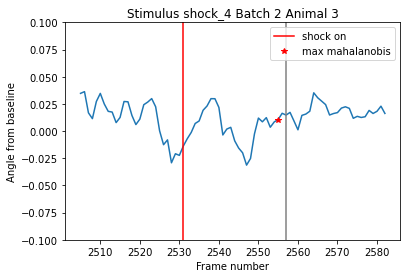

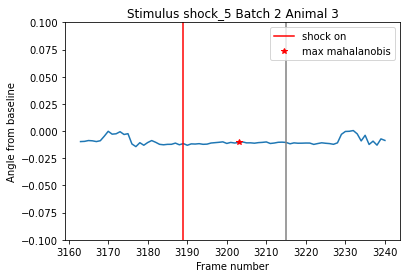

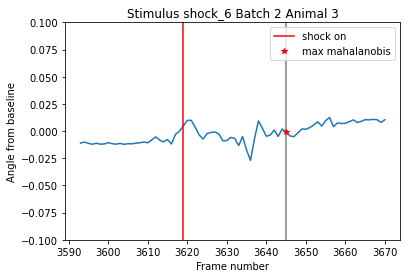

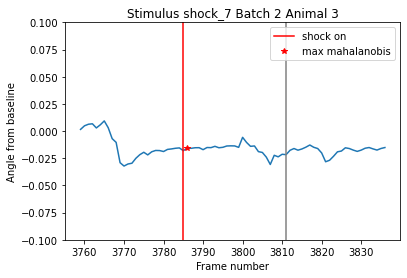

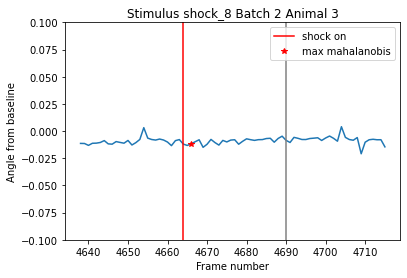

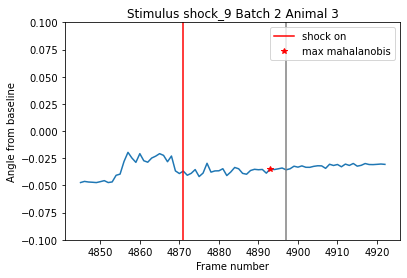

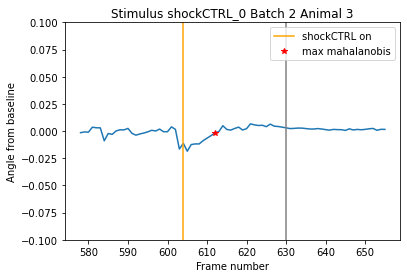

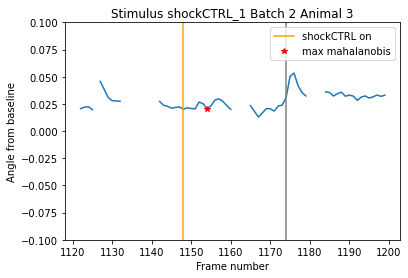

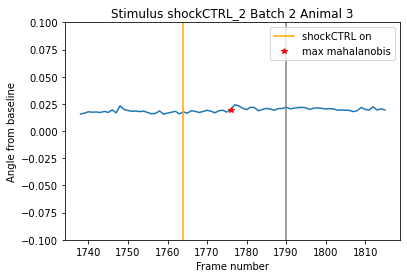

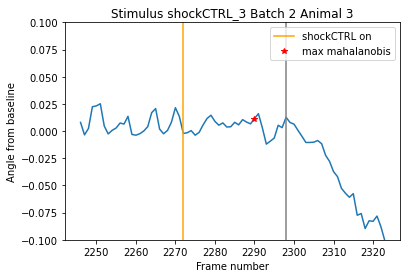

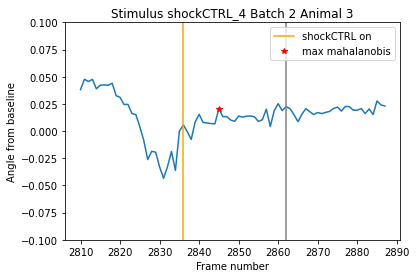

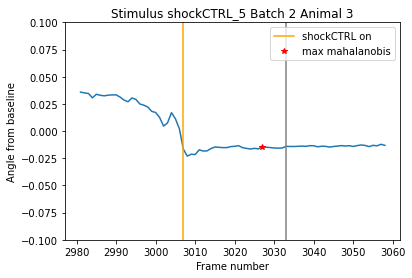

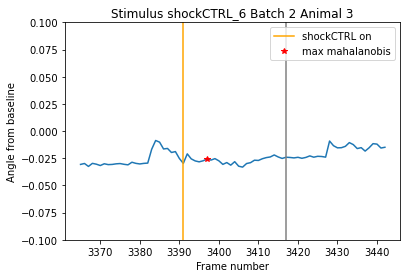

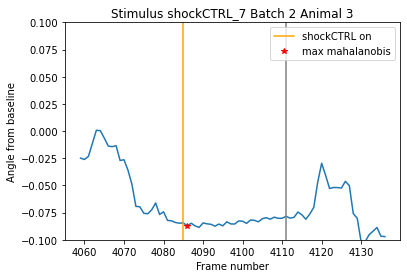

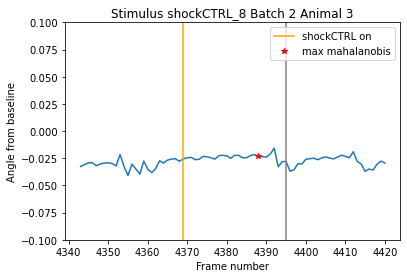

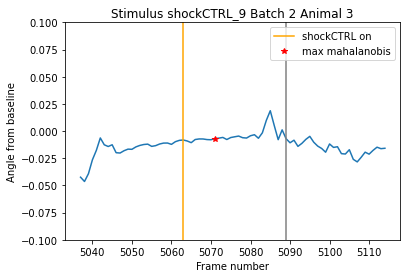

KeyError: 'squeak'

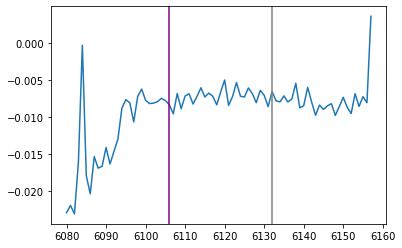

In [3]:
fps = 15.49/3
import matplotlib.pyplot as plt
colors = {'baseline':'dodgerblue','laserHI': 'darkgreen', 'laserLO': 'lightgreen', 'laserCTRL': 'gray','shock':'red', 'shockCTRL': 'orange',
         'squeak' : 'purple', 'squeakCTRL': 'pink'}
def ear_rotation_trials(batch, animall):
    df_polar = pd.read_csv("Batch" + str(batch) + "/PolarCoordinates_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    max_expressions = pd.read_csv("Batch" + str(batch) + "/Frames_Maximal_Expressions_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = list_start.dropna(axis = 1)
    list_prolonged = list_end + fps * 5
    list_prolonged = list_prolonged.round()
    list_before = list_start - fps * 5
    list_before = list_before.round()
    for y in list_start.columns:
            for z in list_start.index:
                comparison = []
                for frame in range(int(list_before.at[z,y]),int(list_prolonged.at[z,y])):
                    # column 5 is Ear3 angle  phi
                    comparison.append(df_polar.iat[frame,5])
                plt.plot(range(int(list_before.at[z,y]),int(list_prolonged.at[z,y])), comparison)
                plt.axvline(list_start.at[z,y],color = colors.get(y), label = str(y) + " on")
                plt.axvline(list_end.at[z,y], color = 'gray')
                plt.plot(max_expressions.at[z,y],df_polar.iat[max_expressions.at[z,y],5], "r*", label = "max mahalanobis")
                plt.title("Stimulus " + str(y)+ "_" + str(z) + " "  + "Batch " + str(batch) + " Animal " + animall)
                plt.xlabel('Frame number')
                plt.ylabel("Angle from baseline")
                plt.ylim(-0.1,0.1)
                plt.legend()
                plt.show()
            
ear_rotation_trials("2", "3")

In [ ]:
def ear_rotation_whole_video(batch, animall):
    df_polar = pd.read_csv("Batch" + str(batch) + "/PolarCoordinates_Animal" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_start = pd.read_csv("Batch" + str(batch) + "/list_start" + str(batch) + str(animall) + ".csv", index_col = 0)
    list_end = pd.read_csv("Batch" + str(batch) + "/list_end" + str(batch) + str(animall) + ".csv", index_col = 0)
    
    plt.plot(df_polar.index.tolist(),df_polar.iloc[:,5])
    plt.title("Video Batch " + str(batch) + " Animal " + animall)
    plt.xlabel('Frame number')
    plt.ylabel("Angle from baseline")
    plt.ylim(-0.1,0.1)
    plt.show()
   
ear_rotation_whole_video("2", "1")